# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 640x480 with 0 Axes>

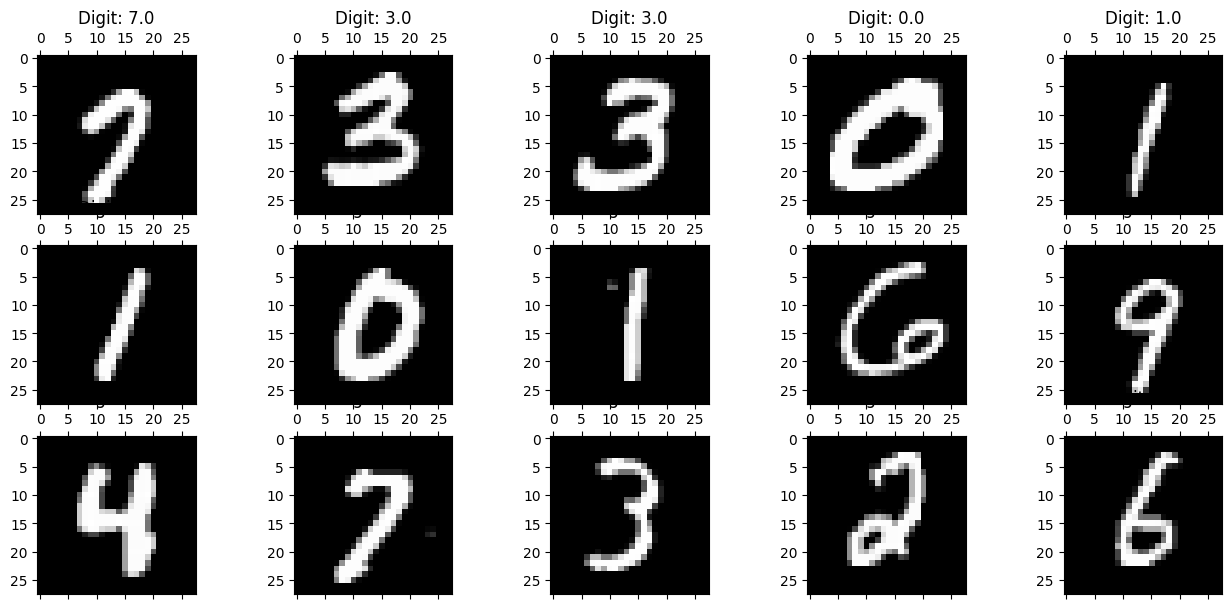

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

#### PCA

⑴ 주성분 갯수 선택하기

In [9]:
len(X_train[0])

784

In [11]:
from sklearn.decomposition import PCA

variance_ratio = {}

for i in range(1, 101):
    # 주성분 갯수를 1부터 100개까지 증가하면서 누적분산비율 확인하기
    pca = PCA(n_components=i)
    pca.fit(X_train)
    # 개수별 누적 분산비율 넣기
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()

- 주성분을 하나만 사용하면, 전체 데이터의 약 10%만 설명 가능하다.
- 주성분을 5개 사용시, 전체 데이터의 약 33% 설명 가능하다.

Elbow point    
곡선의 기울기가 급격히 감소하는 지점

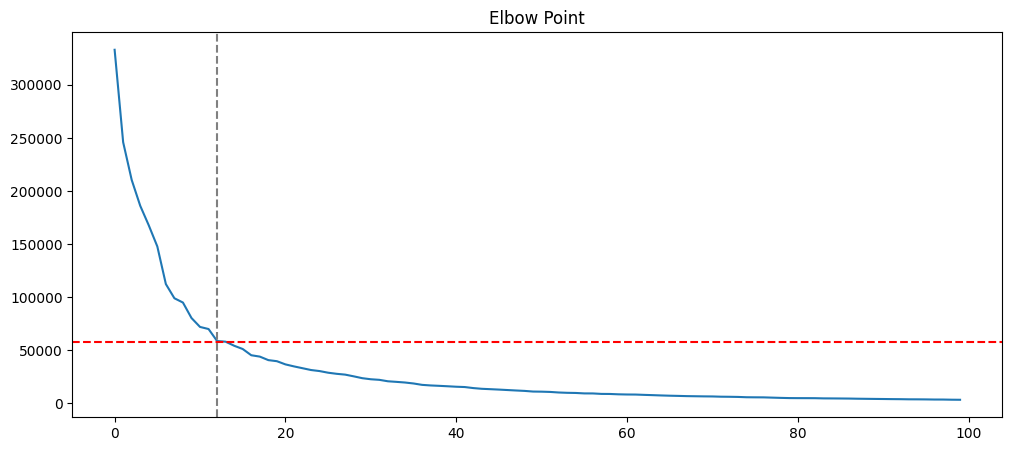

In [12]:
# eigen value
eigen_value = np.sort(pca.explained_variance_)[::-1]

plt.figure(figsize=(12, 5))

plt.plot(eigen_value)
plt.axhline(eigen_value[13], color = 'red', ls = '--')
plt.title('Elbow Point')
plt.axvline(12, ls='--', color='grey')

plt.show()

누적설명률이 70% ~ 80% 이상인 지점

In [13]:
variance_ratio

{'n_1': 0.09711337744535459,
 'n_2': 0.16882008201318988,
 'n_3': 0.2301718507702461,
 'n_4': 0.2844116092565984,
 'n_5': 0.3332841745007417,
 'n_6': 0.3763568011183882,
 'n_7': 0.40909873738005437,
 'n_8': 0.4379420232065625,
 'n_9': 0.4656056564566168,
 'n_10': 0.48901955529525076,
 'n_11': 0.5099840988869876,
 'n_12': 0.5303724357031631,
 'n_13': 0.5474576463877487,
 'n_14': 0.5643656032058577,
 'n_15': 0.5801563895751767,
 'n_16': 0.595055197499587,
 'n_17': 0.6082416194986353,
 'n_18': 0.6210438656159317,
 'n_19': 0.6328939064681433,
 'n_20': 0.6444373427985418,
 'n_21': 0.6551185026914556,
 'n_22': 0.6652368625027859,
 'n_23': 0.6748618438565557,
 'n_24': 0.6839839775182823,
 'n_25': 0.6928096822433204,
 'n_26': 0.7011817159186957,
 'n_27': 0.7092886982752317,
 'n_28': 0.7171366171143108,
 'n_29': 0.7245374572606128,
 'n_30': 0.7314168968116718,
 'n_31': 0.7380092546259367,
 'n_32': 0.7444309469784852,
 'n_33': 0.7504534371491947,
 'n_34': 0.7563358564746068,
 'n_35': 0.762024087

26개

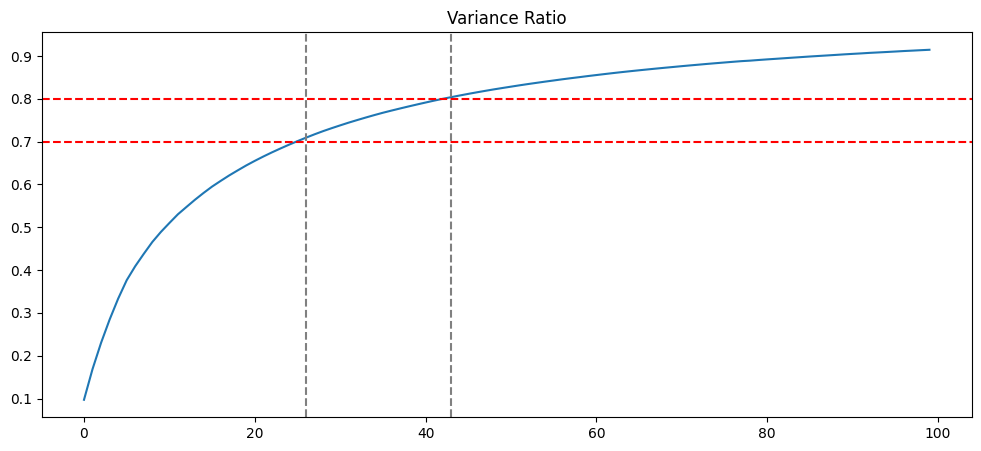

In [14]:
# variance_ratio
plt.figure(figsize=(12, 5))

plt.plot(variance_ratio.values())
plt.axhline(0.7, color = 'red', ls = '--')
plt.axhline(0.8, color = 'red', ls = '--')
plt.title('Variance Ratio')
plt.axvline(26, ls='--', color='grey')
plt.axvline(43, ls='--', color='grey')

plt.show()

26개의 주성분으로 차원 축소

In [15]:
pca = PCA(n_components = 26)
pca.fit(X_train)

train_pca = pd.DataFrame(pca.transform(X_train))
test_pca = pd.DataFrame(pca.transform(X_test))

In [16]:
train_pca

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-185.904184,-109.066123,-524.336382,-8.836181,57.668378,408.648545,551.141987,-198.141730,-494.700382,126.180871,...,27.476976,-198.733199,235.200898,15.923414,-248.563326,-45.020138,-101.778480,273.812735,-1.189080,-92.357509
1,-789.439112,-57.503054,-185.548772,25.266654,-484.328491,-479.156922,229.918248,-110.572410,-251.584732,-367.716559,...,-203.413777,-52.858421,-70.817718,-55.306548,59.564963,-54.297560,181.292858,38.427379,18.640489,-144.042030
2,190.133929,-210.881807,318.010807,267.233628,680.117505,-1046.353393,97.160852,-240.190194,155.521719,-83.595601,...,382.202151,-362.042624,395.538894,-164.378537,-241.452241,-38.185181,4.964735,-69.468960,-41.345179,-42.219627
3,-398.865634,224.173839,399.396068,348.562801,-421.261108,-190.274366,-238.562425,-218.328217,-181.489352,229.622881,...,-135.099149,-45.162723,-59.699865,36.714772,212.360216,-142.037160,-212.557742,219.574173,114.402856,41.582655
4,966.943602,-191.592537,-198.917191,122.816465,-1119.747332,692.264973,-134.198631,-401.116539,244.494853,-442.469261,...,171.326911,47.902368,-73.991472,-192.729237,-27.939834,-48.048515,-303.446194,-21.195903,-200.539917,275.190437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,-640.302977,155.792613,-208.441018,-581.035274,53.244324,-268.193943,596.853751,-259.943643,-17.743474,217.125395,...,-132.987519,179.771909,-148.619261,152.404530,-119.626009,321.987553,-258.321143,46.293133,-31.025154,-22.558224
55996,1140.332799,460.215350,725.750202,361.481258,-655.067320,73.751439,545.703552,-215.753145,508.831257,-297.843029,...,0.319739,282.144511,-427.874665,-180.053080,-359.837270,-377.822962,-223.107804,-49.014024,-156.910998,36.267392
55997,829.794896,-241.094050,-169.093879,118.103750,-902.745893,-32.253442,-296.709334,-721.406743,-320.348026,7.534102,...,-215.947306,48.184320,57.487287,-46.720116,185.760610,246.370881,-345.495160,-2.889757,80.546013,-270.794810
55998,-698.000296,-621.551648,214.344297,205.289126,52.061378,630.290569,-645.612027,80.823569,240.308748,-253.650151,...,17.635159,89.965889,126.266618,239.721661,24.756872,2.416961,169.488087,-184.082695,73.535734,32.990413


#### LDA

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# 학습
lda.fit(X_train, (y_train.ravel()))
train_lda = lda.transform(X_train)
test_lda = lda.transform(X_test)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

Decision Tree

In [18]:
import time

In [27]:
print("DicisionTreeClassifier")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 원본
start = time.time()
dt_origin = DecisionTreeClassifier()
dt_origin.fit(X_train, y_train)
dt_origin_pred = dt_origin.predict(X_test)
accuracy1 = accuracy_score(y_test, dt_origin_pred)
end = time.time()
print("원본데이터", "\n정확도", accuracy1, "\n시간",f"{end - start:.5f} sec")

print()

# PCA
start = time.time()
dt_pca = DecisionTreeClassifier()
dt_pca.fit(train_pca, y_train)
dt_pca_pred = dt_pca.predict(test_pca)
accuracy2 = accuracy_score(y_test, dt_pca_pred)
end = time.time()
print("PCA", "\n정확도", accuracy2, "\n시간", f"{end - start:.5f} sec")

print()

# LDA
start = time.time()
dt_lda = DecisionTreeClassifier()
dt_lda.fit(train_lda, y_train)
dt_lda_pred = dt_lda.predict(test_lda)
accuracy3 = accuracy_score(y_test, dt_lda_pred)
end = time.time()
print("LDA", "\n정확도", accuracy3, "\n시간", f"{end - start:.5f} sec")

DicisionTreeClassifier
원본데이터 
정확도 0.8733571428571428 
시간 38.54990 sec

PCA 
정확도 0.846 
시간 10.52416 sec

LDA 
정확도 0.8535714285714285 
시간 3.65094 sec


Logistic Regression

In [28]:
print("LogisticRegression")
from sklearn.linear_model import LogisticRegression

# 원본
start = time.time()
lr_origin = LogisticRegression()
lr_origin.fit(X_train, y_train.ravel())
lr_origin_pred = lr_origin.predict(X_test)
accuracy1 = accuracy_score(y_test, lr_origin_pred)
end = time.time()
print("원본데이터", "\n정확도", accuracy1, "\n시간",f"{end - start:.5f} sec")

print()

# PCA
start = time.time()
lr_pca = LogisticRegression()
lr_pca.fit(train_pca, y_train.ravel())
lr_pca_pred = lr_pca.predict(test_pca)
accuracy2 = accuracy_score(y_test, lr_pca_pred)
end = time.time()
print("PCA", "\n정확도", accuracy2, "\n시간", f"{end - start:.5f} sec")

print()

# LDA
start = time.time()
lr_lda = LogisticRegression()
lr_lda.fit(train_lda, y_train.ravel())
lr_lda_pred = lr_lda.predict(test_lda)
accuracy3 = accuracy_score(y_test, lr_lda_pred)
end = time.time()
print("LDA", "\n정확도", accuracy3, "\n시간", f"{end - start:.5f} sec")

LogisticRegression


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


원본데이터 
정확도 0.9165 
시간 32.01099 sec



C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


PCA 
정확도 0.8809285714285714 
시간 5.12716 sec

LDA 
정확도 0.8761428571428571 
시간 2.82443 sec


#### 결론

정확도는 원본데이터를 사용한 DecisionTree 분류기가 가장 높았으나 38초로 가장 높은 시간이 걸렸다.    
차원을 축소한 데이터를 사용했을 때 정확도는 조금 떨어졌으나 시간을 많이 단축할 수 있었다.

특정한 틀 없이 자유롭게 해주시면 됩니다!